In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Desktop/Diabetis/diabetes.csv')

In [5]:
df.shape

(2000, 9)

#Checking Nan Value

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
p = df.hist(figsize = (20,20))

In [8]:
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

/home/abhishek/yes/envs/tf/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/abhishek/yes/envs/tf/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


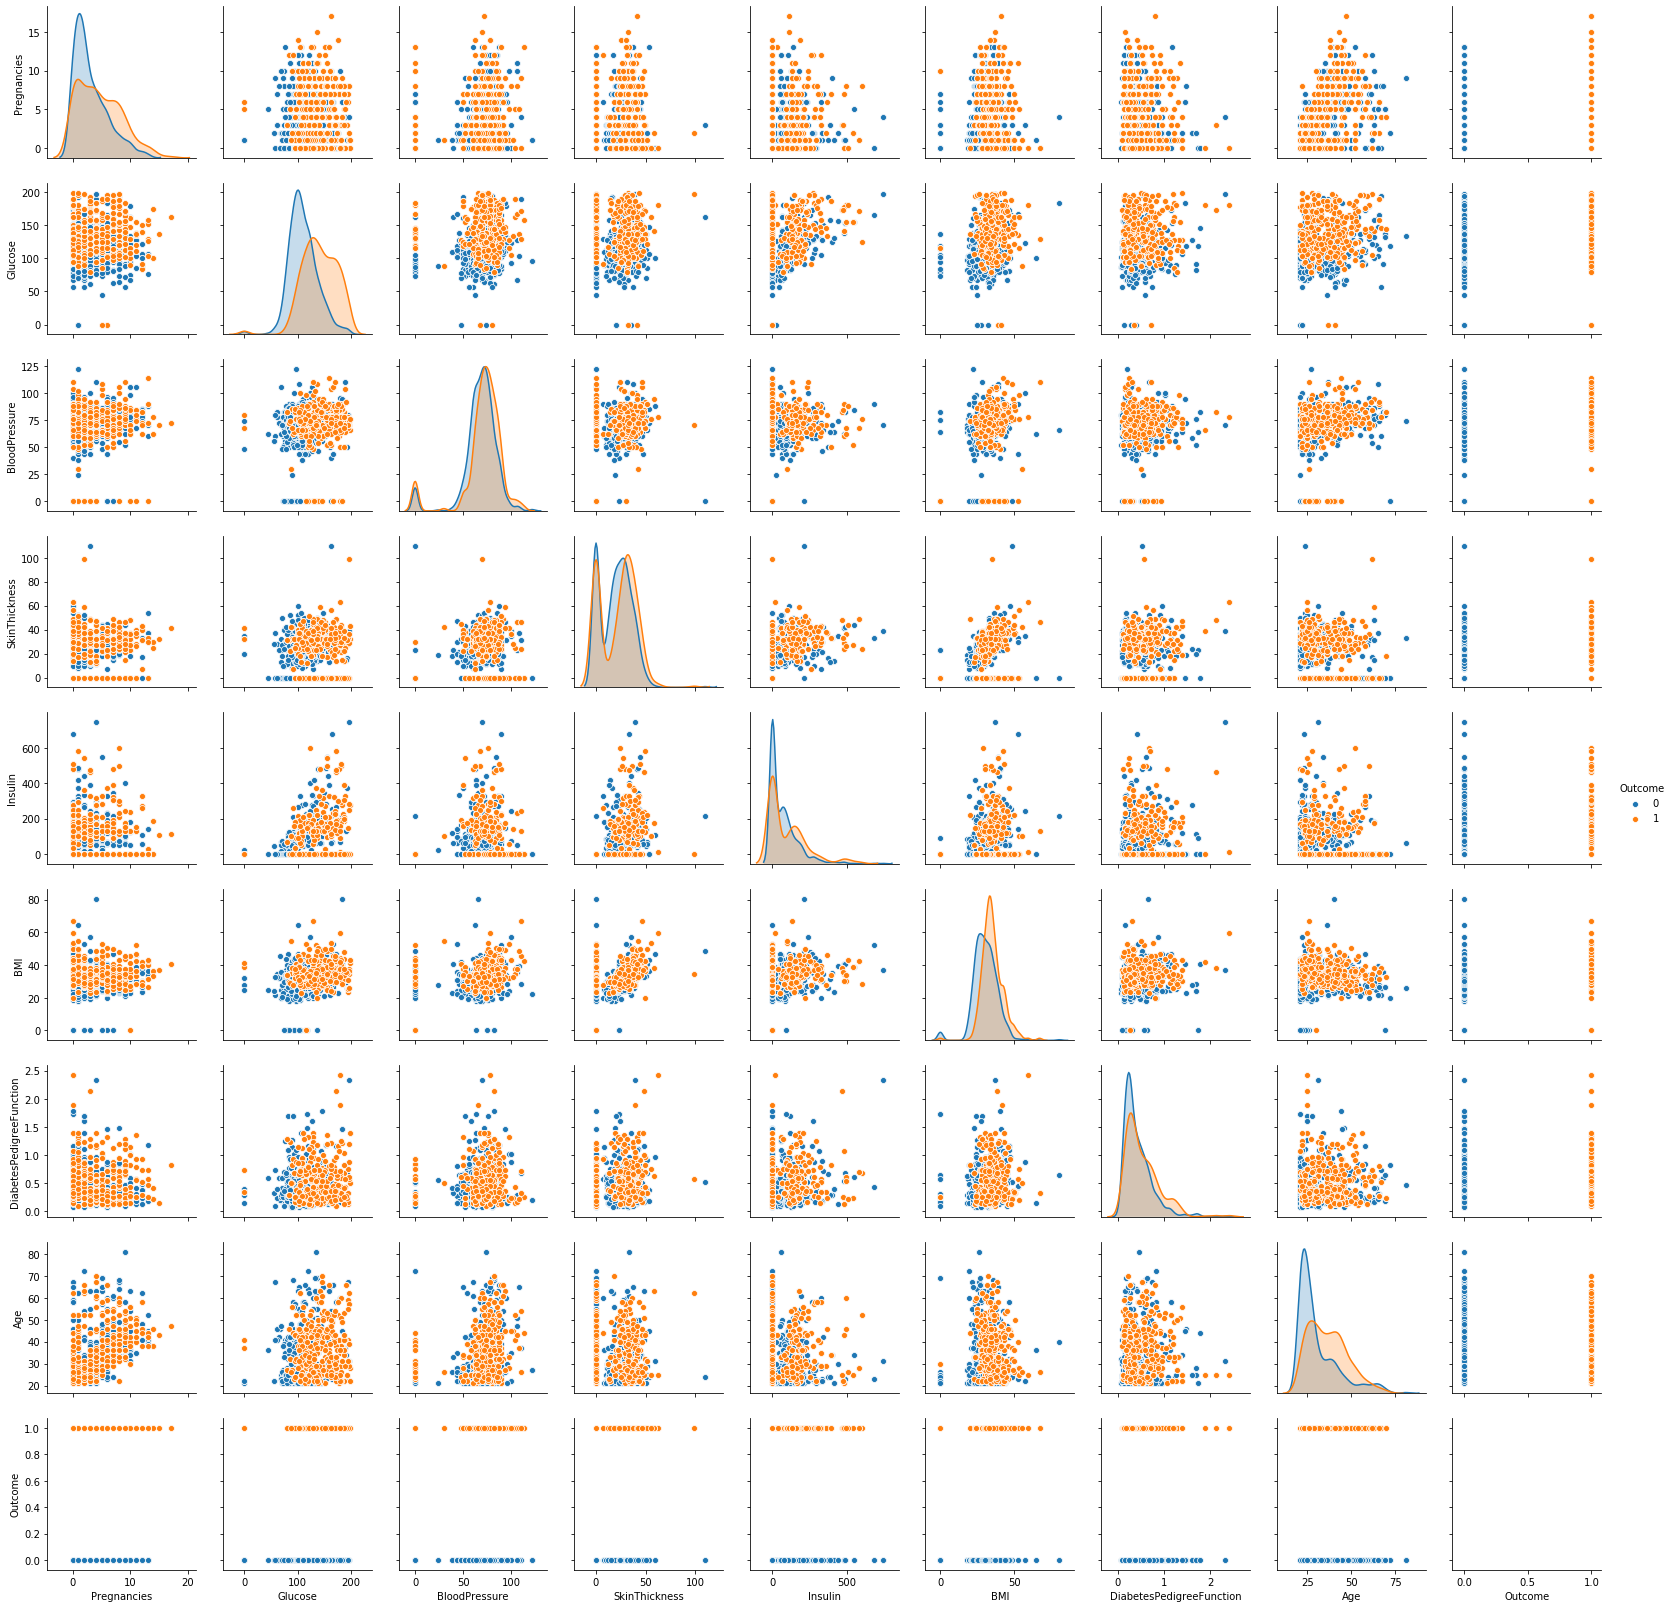

In [9]:
import seaborn as sns
sns.pairplot(df, hue='Outcome')

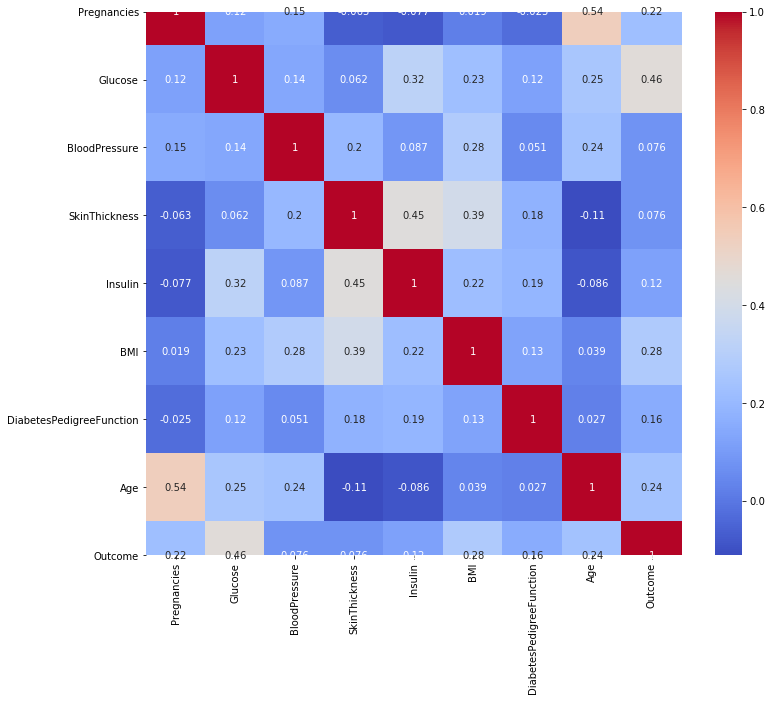

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X = df.iloc[:, 0:8].values

In [14]:
X

array([[2.00e+00, 1.38e+02, 6.20e+01, ..., 3.36e+01, 1.27e-01, 4.70e+01],
       [0.00e+00, 8.40e+01, 8.20e+01, ..., 3.82e+01, 2.33e-01, 2.30e+01],
       [0.00e+00, 1.45e+02, 0.00e+00, ..., 4.42e+01, 6.30e-01, 3.10e+01],
       ...,
       [6.00e+00, 8.50e+01, 7.80e+01, ..., 3.12e+01, 3.82e-01, 4.20e+01],
       [0.00e+00, 1.29e+02, 1.10e+02, ..., 6.71e+01, 3.19e-01, 2.60e+01],
       [2.00e+00, 8.10e+01, 7.20e+01, ..., 3.01e+01, 5.47e-01, 2.50e+01]])

In [15]:
Y = df['Outcome'].values

In [16]:
Y

array([1, 0, 1, ..., 0, 1, 0])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [19]:
len(X_test)

500

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
knn.score(X_train,Y_train)

0.8853333333333333

In [24]:
knn.score(X_test,Y_test)

0.79

In [25]:
pred = knn.predict(X_test)

In [28]:
pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [29]:
Y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gauss = GaussianNB()

In [32]:
gauss.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
gauss.score(X_train,Y_train)

0.756

In [34]:
gausspred = gauss.predict(X_test)

In [35]:
gausspred[:100]

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [36]:
Y_test[:100]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [37]:
from keras.models import Sequential

Using TensorFlow backend.


In [38]:
from keras.layers import Dense, Dropout

In [39]:
model = Sequential()

In [40]:
model.add(Dense(12, input_dim=8, activation='relu'))

In [41]:
model.add(Dense(8, activation='relu'))

In [42]:
model.add(Dropout(.2))

In [43]:
model.add(Dense(4, activation='relu'))

In [44]:
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,Y_train, epochs=1500, batch_size=12,validation_data=(X_test,Y_test) )

Train on 1500 samples, validate on 500 samples
Epoch 1/1500
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3005 - accuracy: 0.6493 - val_loss: 0.3067 - val_accuracy: 0.6380
Epoch 2/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2866 - accuracy: 0.6640 - val_loss: 0.3058 - val_accuracy: 0.6380
Epoch 3/1500
1500/1500 [==============================] - 1s 859us/step - loss: 0.2865 - accuracy: 0.6573 - val_loss: 0.3033 - val_accuracy: 0.6380
Epoch 4/1500
1500/1500 [==============================] - 1s 794us/step - loss: 0.2825 - accuracy: 0.6647 - val_loss: 0.3048 - val_accuracy: 0.6380
Epoch 5/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2779 - accuracy: 0.6647 - val_loss: 0.3034 - val_accuracy: 0.6380
Epoch 6/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy: 0.6613 - val_loss: 0.3024 - val_accuracy: 0.6380
Epoch 7/1500
1500/1500 [==============================] - 1s 928us/step -

Epoch 56/1500
1500/1500 [==============================] - 1s 796us/step - loss: 0.1732 - accuracy: 0.7400 - val_loss: 0.1938 - val_accuracy: 0.7040
Epoch 57/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1759 - accuracy: 0.7407 - val_loss: 0.1847 - val_accuracy: 0.7460
Epoch 58/1500
1500/1500 [==============================] - 1s 764us/step - loss: 0.1714 - accuracy: 0.7393 - val_loss: 0.1834 - val_accuracy: 0.7380
Epoch 59/1500
1500/1500 [==============================] - 1s 875us/step - loss: 0.1703 - accuracy: 0.7533 - val_loss: 0.1839 - val_accuracy: 0.7480
Epoch 60/1500
1500/1500 [==============================] - 1s 703us/step - loss: 0.1715 - accuracy: 0.7547 - val_loss: 0.1866 - val_accuracy: 0.7420
Epoch 61/1500
1500/1500 [==============================] - 1s 668us/step - loss: 0.1750 - accuracy: 0.7333 - val_loss: 0.1894 - val_accuracy: 0.7220
Epoch 62/1500
1500/1500 [==============================] - 1s 700us/step - loss: 0.1719 - accuracy: 0.7527 -

1500/1500 [==============================] - 1s 746us/step - loss: 0.1587 - accuracy: 0.7700 - val_loss: 0.1680 - val_accuracy: 0.7600
Epoch 112/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1588 - accuracy: 0.7667 - val_loss: 0.1765 - val_accuracy: 0.7340
Epoch 113/1500
1500/1500 [==============================] - 1s 829us/step - loss: 0.1592 - accuracy: 0.7753 - val_loss: 0.1709 - val_accuracy: 0.7460
Epoch 114/1500
1500/1500 [==============================] - 1s 924us/step - loss: 0.1546 - accuracy: 0.7800 - val_loss: 0.1716 - val_accuracy: 0.7440
Epoch 115/1500
1500/1500 [==============================] - 1s 878us/step - loss: 0.1540 - accuracy: 0.7767 - val_loss: 0.1716 - val_accuracy: 0.7520
Epoch 116/1500
1500/1500 [==============================] - 1s 855us/step - loss: 0.1557 - accuracy: 0.7760 - val_loss: 0.1611 - val_accuracy: 0.7700
Epoch 117/1500
1500/1500 [==============================] - 1s 845us/step - loss: 0.1560 - accuracy: 0.7727 - val_los

Epoch 166/1500
1500/1500 [==============================] - 1s 776us/step - loss: 0.1480 - accuracy: 0.7880 - val_loss: 0.1635 - val_accuracy: 0.7540
Epoch 167/1500
1500/1500 [==============================] - 1s 701us/step - loss: 0.1458 - accuracy: 0.7880 - val_loss: 0.1632 - val_accuracy: 0.7640
Epoch 168/1500
1500/1500 [==============================] - 1s 981us/step - loss: 0.1503 - accuracy: 0.7793 - val_loss: 0.1754 - val_accuracy: 0.7300
Epoch 169/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1502 - accuracy: 0.7833 - val_loss: 0.1641 - val_accuracy: 0.7660
Epoch 170/1500
1500/1500 [==============================] - 1s 807us/step - loss: 0.1458 - accuracy: 0.7807 - val_loss: 0.1584 - val_accuracy: 0.7620
Epoch 171/1500
1500/1500 [==============================] - 1s 849us/step - loss: 0.1551 - accuracy: 0.7827 - val_loss: 0.1626 - val_accuracy: 0.7600
Epoch 172/1500
1500/1500 [==============================] - 1s 810us/step - loss: 0.1465 - accuracy: 0

1500/1500 [==============================] - 1s 603us/step - loss: 0.1466 - accuracy: 0.7860 - val_loss: 0.1621 - val_accuracy: 0.7660
Epoch 221/1500
1500/1500 [==============================] - 1s 567us/step - loss: 0.1436 - accuracy: 0.7907 - val_loss: 0.1719 - val_accuracy: 0.7540
Epoch 222/1500
1500/1500 [==============================] - 1s 600us/step - loss: 0.1455 - accuracy: 0.7873 - val_loss: 0.1645 - val_accuracy: 0.7580
Epoch 223/1500
1500/1500 [==============================] - 1s 636us/step - loss: 0.1431 - accuracy: 0.7927 - val_loss: 0.1712 - val_accuracy: 0.7460
Epoch 224/1500
1500/1500 [==============================] - 1s 600us/step - loss: 0.1462 - accuracy: 0.7880 - val_loss: 0.1706 - val_accuracy: 0.7460
Epoch 225/1500
1500/1500 [==============================] - 1s 657us/step - loss: 0.1428 - accuracy: 0.7980 - val_loss: 0.1929 - val_accuracy: 0.7200
Epoch 226/1500
1500/1500 [==============================] - 1s 667us/step - loss: 0.1488 - accuracy: 0.7700 - val_l

Epoch 275/1500
1500/1500 [==============================] - 1s 615us/step - loss: 0.1448 - accuracy: 0.7933 - val_loss: 0.1779 - val_accuracy: 0.7400
Epoch 276/1500
1500/1500 [==============================] - 1s 588us/step - loss: 0.1392 - accuracy: 0.7987 - val_loss: 0.1699 - val_accuracy: 0.7520
Epoch 277/1500
1500/1500 [==============================] - 1s 551us/step - loss: 0.1424 - accuracy: 0.7847 - val_loss: 0.1712 - val_accuracy: 0.7500
Epoch 278/1500
1500/1500 [==============================] - 1s 552us/step - loss: 0.1387 - accuracy: 0.7960 - val_loss: 0.1668 - val_accuracy: 0.7620
Epoch 279/1500
1500/1500 [==============================] - 1s 576us/step - loss: 0.1448 - accuracy: 0.7860 - val_loss: 0.1677 - val_accuracy: 0.7560
Epoch 280/1500
1500/1500 [==============================] - 1s 947us/step - loss: 0.1353 - accuracy: 0.8093 - val_loss: 0.1599 - val_accuracy: 0.7640
Epoch 281/1500
1500/1500 [==============================] - 1s 703us/step - loss: 0.1408 - accuracy:

1500/1500 [==============================] - 1s 859us/step - loss: 0.1309 - accuracy: 0.8167 - val_loss: 0.1740 - val_accuracy: 0.7480
Epoch 330/1500
1500/1500 [==============================] - 1s 675us/step - loss: 0.1387 - accuracy: 0.7927 - val_loss: 0.1845 - val_accuracy: 0.7340
Epoch 331/1500
1500/1500 [==============================] - 1s 620us/step - loss: 0.1381 - accuracy: 0.8040 - val_loss: 0.1783 - val_accuracy: 0.7420
Epoch 332/1500
1500/1500 [==============================] - 1s 593us/step - loss: 0.1365 - accuracy: 0.8047 - val_loss: 0.1671 - val_accuracy: 0.7640
Epoch 333/1500
1500/1500 [==============================] - 1s 590us/step - loss: 0.1291 - accuracy: 0.8067 - val_loss: 0.1680 - val_accuracy: 0.7600
Epoch 334/1500
1500/1500 [==============================] - 1s 638us/step - loss: 0.1348 - accuracy: 0.7967 - val_loss: 0.1737 - val_accuracy: 0.7400oss: 0.134
Epoch 335/1500
1500/1500 [==============================] - 1s 610us/step - loss: 0.1321 - accuracy: 0.81

1500/1500 [==============================] - 1s 709us/step - loss: 0.1362 - accuracy: 0.8007 - val_loss: 0.1795 - val_accuracy: 0.7380
Epoch 384/1500
1500/1500 [==============================] - 1s 671us/step - loss: 0.1299 - accuracy: 0.8200 - val_loss: 0.1784 - val_accuracy: 0.7400
Epoch 385/1500
1500/1500 [==============================] - 1s 619us/step - loss: 0.1292 - accuracy: 0.8220 - val_loss: 0.1676 - val_accuracy: 0.7680
Epoch 386/1500
1500/1500 [==============================] - 1s 650us/step - loss: 0.1292 - accuracy: 0.8180 - val_loss: 0.1681 - val_accuracy: 0.7660
Epoch 387/1500
1500/1500 [==============================] - 1s 603us/step - loss: 0.1306 - accuracy: 0.8120 - val_loss: 0.1579 - val_accuracy: 0.7740
Epoch 388/1500
1500/1500 [==============================] - 1s 626us/step - loss: 0.1265 - accuracy: 0.8293 - val_loss: 0.1540 - val_accuracy: 0.7780
Epoch 389/1500
1500/1500 [==============================] - 1s 608us/step - loss: 0.1317 - accuracy: 0.8213 - val_l

Epoch 438/1500
1500/1500 [==============================] - 1s 569us/step - loss: 0.1326 - accuracy: 0.8133 - val_loss: 0.1602 - val_accuracy: 0.7660
Epoch 439/1500
1500/1500 [==============================] - 1s 552us/step - loss: 0.1270 - accuracy: 0.8200 - val_loss: 0.1643 - val_accuracy: 0.7660
Epoch 440/1500
1500/1500 [==============================] - 1s 571us/step - loss: 0.1261 - accuracy: 0.8173 - val_loss: 0.1583 - val_accuracy: 0.7680
Epoch 441/1500
1500/1500 [==============================] - 1s 613us/step - loss: 0.1312 - accuracy: 0.8153 - val_loss: 0.1742 - val_accuracy: 0.7520
Epoch 442/1500
1500/1500 [==============================] - 1s 614us/step - loss: 0.1293 - accuracy: 0.8173 - val_loss: 0.1703 - val_accuracy: 0.7520
Epoch 443/1500
1500/1500 [==============================] - 1s 646us/step - loss: 0.1250 - accuracy: 0.8247 - val_loss: 0.1714 - val_accuracy: 0.7500
Epoch 444/1500
1500/1500 [==============================] - 1s 939us/step - loss: 0.1298 - accuracy:

1500/1500 [==============================] - 1s 664us/step - loss: 0.1280 - accuracy: 0.8207 - val_loss: 0.1782 - val_accuracy: 0.7480
Epoch 493/1500
1500/1500 [==============================] - 1s 950us/step - loss: 0.1301 - accuracy: 0.8180 - val_loss: 0.1737 - val_accuracy: 0.7520
Epoch 494/1500
1500/1500 [==============================] - 1s 629us/step - loss: 0.1272 - accuracy: 0.8187 - val_loss: 0.1651 - val_accuracy: 0.7640
Epoch 495/1500
1500/1500 [==============================] - 1s 580us/step - loss: 0.1220 - accuracy: 0.8300 - val_loss: 0.1814 - val_accuracy: 0.7500
Epoch 496/1500
1500/1500 [==============================] - 1s 578us/step - loss: 0.1310 - accuracy: 0.8133 - val_loss: 0.1638 - val_accuracy: 0.7840
Epoch 497/1500
1500/1500 [==============================] - 1s 551us/step - loss: 0.1272 - accuracy: 0.8193 - val_loss: 0.1674 - val_accuracy: 0.7620
Epoch 498/1500
1500/1500 [==============================] - 1s 561us/step - loss: 0.1228 - accuracy: 0.8320 - val_l

Epoch 547/1500
1500/1500 [==============================] - 1s 680us/step - loss: 0.1311 - accuracy: 0.8100 - val_loss: 0.1838 - val_accuracy: 0.7520
Epoch 548/1500
1500/1500 [==============================] - 1s 733us/step - loss: 0.1296 - accuracy: 0.8200 - val_loss: 0.1708 - val_accuracy: 0.7460
Epoch 549/1500
1500/1500 [==============================] - 1s 617us/step - loss: 0.1252 - accuracy: 0.8167 - val_loss: 0.1688 - val_accuracy: 0.7640
Epoch 550/1500
1500/1500 [==============================] - 1s 600us/step - loss: 0.1297 - accuracy: 0.8180 - val_loss: 0.1663 - val_accuracy: 0.7640
Epoch 551/1500
1500/1500 [==============================] - 1s 587us/step - loss: 0.1285 - accuracy: 0.8180 - val_loss: 0.1692 - val_accuracy: 0.7580
Epoch 552/1500
1500/1500 [==============================] - 1s 622us/step - loss: 0.1244 - accuracy: 0.8287 - val_loss: 0.1646 - val_accuracy: 0.7740
Epoch 553/1500
1500/1500 [==============================] - 1s 603us/step - loss: 0.1222 - accuracy:

1500/1500 [==============================] - 1s 561us/step - loss: 0.1233 - accuracy: 0.8300 - val_loss: 0.1718 - val_accuracy: 0.7540
Epoch 602/1500
1500/1500 [==============================] - 1s 594us/step - loss: 0.1208 - accuracy: 0.8340 - val_loss: 0.1661 - val_accuracy: 0.7660
Epoch 603/1500
1500/1500 [==============================] - 1s 630us/step - loss: 0.1264 - accuracy: 0.8213 - val_loss: 0.1591 - val_accuracy: 0.7740
Epoch 604/1500
1500/1500 [==============================] - 1s 649us/step - loss: 0.1234 - accuracy: 0.8267 - val_loss: 0.1713 - val_accuracy: 0.7680
Epoch 605/1500
1500/1500 [==============================] - 1s 601us/step - loss: 0.1254 - accuracy: 0.8233 - val_loss: 0.1491 - val_accuracy: 0.8020
Epoch 606/1500
1500/1500 [==============================] - 1s 634us/step - loss: 0.1292 - accuracy: 0.8193 - val_loss: 0.1678 - val_accuracy: 0.7720
Epoch 607/1500
1500/1500 [==============================] - 1s 654us/step - loss: 0.1294 - accuracy: 0.8167 - val_l

1500/1500 [==============================] - 1s 607us/step - loss: 0.1213 - accuracy: 0.8253 - val_loss: 0.1584 - val_accuracy: 0.7840
Epoch 656/1500
1500/1500 [==============================] - 1s 569us/step - loss: 0.1214 - accuracy: 0.8220 - val_loss: 0.1723 - val_accuracy: 0.7520
Epoch 657/1500
1500/1500 [==============================] - 1s 859us/step - loss: 0.1213 - accuracy: 0.8293 - val_loss: 0.1758 - val_accuracy: 0.7580
Epoch 658/1500
1500/1500 [==============================] - 1s 786us/step - loss: 0.1246 - accuracy: 0.8180 - val_loss: 0.1748 - val_accuracy: 0.7560
Epoch 659/1500
1500/1500 [==============================] - 1s 564us/step - loss: 0.1319 - accuracy: 0.8107 - val_loss: 0.1633 - val_accuracy: 0.7640
Epoch 660/1500
1500/1500 [==============================] - 1s 579us/step - loss: 0.1196 - accuracy: 0.8273 - val_loss: 0.1759 - val_accuracy: 0.7480
Epoch 661/1500
1500/1500 [==============================] - 1s 615us/step - loss: 0.1221 - accuracy: 0.8260 - val_l

Epoch 710/1500
1500/1500 [==============================] - 1s 581us/step - loss: 0.1147 - accuracy: 0.8487 - val_loss: 0.1722 - val_accuracy: 0.7520
Epoch 711/1500
1500/1500 [==============================] - 1s 587us/step - loss: 0.1213 - accuracy: 0.8333 - val_loss: 0.1591 - val_accuracy: 0.7820
Epoch 712/1500
1500/1500 [==============================] - 1s 614us/step - loss: 0.1209 - accuracy: 0.8293 - val_loss: 0.1647 - val_accuracy: 0.7640
Epoch 713/1500
1500/1500 [==============================] - 1s 624us/step - loss: 0.1223 - accuracy: 0.8280 - val_loss: 0.1616 - val_accuracy: 0.7660
Epoch 714/1500
1500/1500 [==============================] - 1s 622us/step - loss: 0.1200 - accuracy: 0.8327 - val_loss: 0.1717 - val_accuracy: 0.7540
Epoch 715/1500
1500/1500 [==============================] - 1s 668us/step - loss: 0.1214 - accuracy: 0.8353 - val_loss: 0.1743 - val_accuracy: 0.7580
Epoch 716/1500
1500/1500 [==============================] - 1s 677us/step - loss: 0.1225 - accuracy:

1500/1500 [==============================] - 1s 639us/step - loss: 0.1214 - accuracy: 0.8333 - val_loss: 0.1634 - val_accuracy: 0.7700
Epoch 765/1500
1500/1500 [==============================] - 1s 546us/step - loss: 0.1181 - accuracy: 0.8440 - val_loss: 0.1770 - val_accuracy: 0.7500
Epoch 766/1500
1500/1500 [==============================] - 1s 682us/step - loss: 0.1162 - accuracy: 0.8353 - val_loss: 0.1729 - val_accuracy: 0.7600
Epoch 767/1500
1500/1500 [==============================] - 1s 609us/step - loss: 0.1170 - accuracy: 0.8387 - val_loss: 0.1695 - val_accuracy: 0.7620
Epoch 768/1500
1500/1500 [==============================] - 1s 596us/step - loss: 0.1178 - accuracy: 0.8300 - val_loss: 0.1661 - val_accuracy: 0.7680
Epoch 769/1500
1500/1500 [==============================] - 1s 656us/step - loss: 0.1193 - accuracy: 0.8340 - val_loss: 0.1405 - val_accuracy: 0.8160
Epoch 770/1500
1500/1500 [==============================] - 1s 580us/step - loss: 0.1249 - accuracy: 0.8180 - val_l

Epoch 819/1500
1500/1500 [==============================] - 1s 507us/step - loss: 0.1207 - accuracy: 0.8287 - val_loss: 0.1597 - val_accuracy: 0.7680
Epoch 820/1500
1500/1500 [==============================] - 1s 663us/step - loss: 0.1243 - accuracy: 0.8300 - val_loss: 0.1497 - val_accuracy: 0.7860
Epoch 821/1500
1500/1500 [==============================] - 1s 572us/step - loss: 0.1221 - accuracy: 0.8293 - val_loss: 0.1717 - val_accuracy: 0.7540
Epoch 822/1500
1500/1500 [==============================] - 1s 577us/step - loss: 0.1183 - accuracy: 0.8313 - val_loss: 0.1765 - val_accuracy: 0.7540
Epoch 823/1500
1500/1500 [==============================] - 1s 559us/step - loss: 0.1168 - accuracy: 0.8473 - val_loss: 0.1824 - val_accuracy: 0.7420
Epoch 824/1500
1500/1500 [==============================] - 1s 891us/step - loss: 0.1180 - accuracy: 0.8320 - val_loss: 0.1758 - val_accuracy: 0.7540
Epoch 825/1500
1500/1500 [==============================] - 1s 820us/step - loss: 0.1174 - accuracy:

1500/1500 [==============================] - 1s 661us/step - loss: 0.1204 - accuracy: 0.8347 - val_loss: 0.1582 - val_accuracy: 0.7740
Epoch 874/1500
1500/1500 [==============================] - 1s 866us/step - loss: 0.1165 - accuracy: 0.8407 - val_loss: 0.1613 - val_accuracy: 0.7640
Epoch 875/1500
1500/1500 [==============================] - 1s 838us/step - loss: 0.1230 - accuracy: 0.8327 - val_loss: 0.1677 - val_accuracy: 0.7600
Epoch 876/1500
1500/1500 [==============================] - 1s 576us/step - loss: 0.1203 - accuracy: 0.8280 - val_loss: 0.1744 - val_accuracy: 0.7520
Epoch 877/1500
1500/1500 [==============================] - 1s 577us/step - loss: 0.1162 - accuracy: 0.8420 - val_loss: 0.1547 - val_accuracy: 0.7780
Epoch 878/1500
1500/1500 [==============================] - 1s 552us/step - loss: 0.1184 - accuracy: 0.8387 - val_loss: 0.1755 - val_accuracy: 0.7500
Epoch 879/1500
1500/1500 [==============================] - 1s 594us/step - loss: 0.1184 - accuracy: 0.8327 - val_l

Epoch 928/1500
1500/1500 [==============================] - 1s 600us/step - loss: 0.1137 - accuracy: 0.8453 - val_loss: 0.1654 - val_accuracy: 0.7660
Epoch 929/1500
1500/1500 [==============================] - 1s 562us/step - loss: 0.1197 - accuracy: 0.8307 - val_loss: 0.1630 - val_accuracy: 0.7720
Epoch 930/1500
1500/1500 [==============================] - 1s 579us/step - loss: 0.1197 - accuracy: 0.8320 - val_loss: 0.1575 - val_accuracy: 0.7720
Epoch 931/1500
1500/1500 [==============================] - 1s 572us/step - loss: 0.1185 - accuracy: 0.8447 - val_loss: 0.1513 - val_accuracy: 0.7920
Epoch 932/1500
1500/1500 [==============================] - 1s 538us/step - loss: 0.1235 - accuracy: 0.8300 - val_loss: 0.1832 - val_accuracy: 0.7400
Epoch 933/1500
1500/1500 [==============================] - 1s 562us/step - loss: 0.1196 - accuracy: 0.8313 - val_loss: 0.1645 - val_accuracy: 0.7700
Epoch 934/1500
1500/1500 [==============================] - 1s 572us/step - loss: 0.1204 - accuracy:

1500/1500 [==============================] - 1s 681us/step - loss: 0.1157 - accuracy: 0.8360 - val_loss: 0.1511 - val_accuracy: 0.7820
Epoch 983/1500
1500/1500 [==============================] - 1s 728us/step - loss: 0.1151 - accuracy: 0.8440 - val_loss: 0.1549 - val_accuracy: 0.7800
Epoch 984/1500
1500/1500 [==============================] - 1s 711us/step - loss: 0.1212 - accuracy: 0.8353 - val_loss: 0.1619 - val_accuracy: 0.7640
Epoch 985/1500
1500/1500 [==============================] - 1s 680us/step - loss: 0.1167 - accuracy: 0.8367 - val_loss: 0.1666 - val_accuracy: 0.7520
Epoch 986/1500
1500/1500 [==============================] - 1s 630us/step - loss: 0.1114 - accuracy: 0.8473 - val_loss: 0.1489 - val_accuracy: 0.7860
Epoch 987/1500
1500/1500 [==============================] - 1s 551us/step - loss: 0.1242 - accuracy: 0.8280 - val_loss: 0.1769 - val_accuracy: 0.7540
Epoch 988/1500
1500/1500 [==============================] - 1s 547us/step - loss: 0.1202 - accuracy: 0.8380 - val_l

1500/1500 [==============================] - 1s 667us/step - loss: 0.1162 - accuracy: 0.8353 - val_loss: 0.1716 - val_accuracy: 0.7600
Epoch 1037/1500
1500/1500 [==============================] - 1s 559us/step - loss: 0.1158 - accuracy: 0.8427 - val_loss: 0.1657 - val_accuracy: 0.7700
Epoch 1038/1500
1500/1500 [==============================] - 1s 552us/step - loss: 0.1217 - accuracy: 0.8293 - val_loss: 0.1719 - val_accuracy: 0.7540
Epoch 1039/1500
1500/1500 [==============================] - 1s 551us/step - loss: 0.1187 - accuracy: 0.8313 - val_loss: 0.1669 - val_accuracy: 0.7540
Epoch 1040/1500
1500/1500 [==============================] - 1s 746us/step - loss: 0.1151 - accuracy: 0.8367 - val_loss: 0.1845 - val_accuracy: 0.7500
Epoch 1041/1500
1500/1500 [==============================] - 1s 843us/step - loss: 0.1149 - accuracy: 0.8433 - val_loss: 0.1695 - val_accuracy: 0.7660
Epoch 1042/1500
1500/1500 [==============================] - 1s 583us/step - loss: 0.1238 - accuracy: 0.8267 -

1500/1500 [==============================] - 1s 663us/step - loss: 0.1234 - accuracy: 0.8300 - val_loss: 0.1549 - val_accuracy: 0.7780
Epoch 1091/1500
1500/1500 [==============================] - 1s 857us/step - loss: 0.1177 - accuracy: 0.8347 - val_loss: 0.1663 - val_accuracy: 0.7660
Epoch 1092/1500
1500/1500 [==============================] - 1s 727us/step - loss: 0.1152 - accuracy: 0.8487 - val_loss: 0.1588 - val_accuracy: 0.7720
Epoch 1093/1500
1500/1500 [==============================] - 1s 683us/step - loss: 0.1128 - accuracy: 0.8467 - val_loss: 0.1526 - val_accuracy: 0.7900
Epoch 1094/1500
1500/1500 [==============================] - 1s 596us/step - loss: 0.1154 - accuracy: 0.8460 - val_loss: 0.1731 - val_accuracy: 0.7520
Epoch 1095/1500
1500/1500 [==============================] - 1s 580us/step - loss: 0.1248 - accuracy: 0.8233 - val_loss: 0.1621 - val_accuracy: 0.7600
Epoch 1096/1500
1500/1500 [==============================] - 1s 609us/step - loss: 0.1195 - accuracy: 0.8307 -

1500/1500 [==============================] - 1s 605us/step - loss: 0.1202 - accuracy: 0.8327 - val_loss: 0.1900 - val_accuracy: 0.7140
Epoch 1145/1500
1500/1500 [==============================] - 1s 675us/step - loss: 0.1223 - accuracy: 0.8280 - val_loss: 0.1791 - val_accuracy: 0.7520
Epoch 1146/1500
1500/1500 [==============================] - 1s 635us/step - loss: 0.1211 - accuracy: 0.8380 - val_loss: 0.1569 - val_accuracy: 0.7840
Epoch 1147/1500
1500/1500 [==============================] - 1s 559us/step - loss: 0.1173 - accuracy: 0.8327 - val_loss: 0.1466 - val_accuracy: 0.8020
Epoch 1148/1500
1500/1500 [==============================] - 1s 575us/step - loss: 0.1202 - accuracy: 0.8347 - val_loss: 0.1851 - val_accuracy: 0.7280
Epoch 1149/1500
1500/1500 [==============================] - 1s 698us/step - loss: 0.1195 - accuracy: 0.8300 - val_loss: 0.1672 - val_accuracy: 0.7680
Epoch 1150/1500
1500/1500 [==============================] - 1s 692us/step - loss: 0.1171 - accuracy: 0.8407 -

Epoch 1199/1500
1500/1500 [==============================] - 1s 835us/step - loss: 0.1165 - accuracy: 0.8400 - val_loss: 0.1512 - val_accuracy: 0.7960
Epoch 1200/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1226 - accuracy: 0.8300 - val_loss: 0.1675 - val_accuracy: 0.7580
Epoch 1201/1500
1500/1500 [==============================] - 1s 744us/step - loss: 0.1146 - accuracy: 0.8460 - val_loss: 0.1781 - val_accuracy: 0.7460
Epoch 1202/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1196 - accuracy: 0.8373 - val_loss: 0.1940 - val_accuracy: 0.7400
Epoch 1203/1500
1500/1500 [==============================] - 1s 782us/step - loss: 0.1216 - accuracy: 0.8267 - val_loss: 0.1705 - val_accuracy: 0.7620
Epoch 1204/1500
1500/1500 [==============================] - 1s 770us/step - loss: 0.1167 - accuracy: 0.8393 - val_loss: 0.1750 - val_accuracy: 0.7560
Epoch 1205/1500
1500/1500 [==============================] - 1s 887us/step - loss: 0.1160 - accura

Epoch 1254/1500
1500/1500 [==============================] - 1s 766us/step - loss: 0.1148 - accuracy: 0.8447 - val_loss: 0.1633 - val_accuracy: 0.7600
Epoch 1255/1500
1500/1500 [==============================] - 1s 866us/step - loss: 0.1174 - accuracy: 0.8360 - val_loss: 0.1608 - val_accuracy: 0.7680
Epoch 1256/1500
1500/1500 [==============================] - 1s 724us/step - loss: 0.1171 - accuracy: 0.8387 - val_loss: 0.1700 - val_accuracy: 0.7560
Epoch 1257/1500
1500/1500 [==============================] - 1s 722us/step - loss: 0.1165 - accuracy: 0.8340 - val_loss: 0.1766 - val_accuracy: 0.7380
Epoch 1258/1500
1500/1500 [==============================] - 1s 734us/step - loss: 0.1203 - accuracy: 0.8347 - val_loss: 0.1549 - val_accuracy: 0.7820
Epoch 1259/1500
1500/1500 [==============================] - 1s 843us/step - loss: 0.1202 - accuracy: 0.8287 - val_loss: 0.1666 - val_accuracy: 0.7640
Epoch 1260/1500
1500/1500 [==============================] - 1s 881us/step - loss: 0.1182 - ac

1500/1500 [==============================] - 1s 807us/step - loss: 0.1183 - accuracy: 0.8320 - val_loss: 0.1728 - val_accuracy: 0.7540
Epoch 1309/1500
1500/1500 [==============================] - 1s 776us/step - loss: 0.1206 - accuracy: 0.8307 - val_loss: 0.1792 - val_accuracy: 0.7480
Epoch 1310/1500
1500/1500 [==============================] - 1s 818us/step - loss: 0.1236 - accuracy: 0.8313 - val_loss: 0.1775 - val_accuracy: 0.7480
Epoch 1311/1500
1500/1500 [==============================] - 1s 904us/step - loss: 0.1166 - accuracy: 0.8380 - val_loss: 0.1859 - val_accuracy: 0.7340
Epoch 1312/1500
1500/1500 [==============================] - 1s 992us/step - loss: 0.1260 - accuracy: 0.8200 - val_loss: 0.1756 - val_accuracy: 0.7540
Epoch 1313/1500
1500/1500 [==============================] - 1s 802us/step - loss: 0.1197 - accuracy: 0.8367 - val_loss: 0.1624 - val_accuracy: 0.7720
Epoch 1314/1500
1500/1500 [==============================] - 1s 844us/step - loss: 0.1172 - accuracy: 0.8413 -

Epoch 1363/1500
1500/1500 [==============================] - 1s 746us/step - loss: 0.1154 - accuracy: 0.8440 - val_loss: 0.1669 - val_accuracy: 0.7640
Epoch 1364/1500
1500/1500 [==============================] - 1s 684us/step - loss: 0.1137 - accuracy: 0.8473 - val_loss: 0.1535 - val_accuracy: 0.7900
Epoch 1365/1500
1500/1500 [==============================] - 1s 769us/step - loss: 0.1325 - accuracy: 0.8120 - val_loss: 0.1565 - val_accuracy: 0.7700
Epoch 1366/1500
1500/1500 [==============================] - 1s 756us/step - loss: 0.1151 - accuracy: 0.8447 - val_loss: 0.1590 - val_accuracy: 0.7780
Epoch 1367/1500
1500/1500 [==============================] - 1s 726us/step - loss: 0.1159 - accuracy: 0.8487 - val_loss: 0.1524 - val_accuracy: 0.7860
Epoch 1368/1500
1500/1500 [==============================] - 1s 685us/step - loss: 0.1163 - accuracy: 0.8393 - val_loss: 0.1623 - val_accuracy: 0.7720
Epoch 1369/1500
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1157 - accu

1500/1500 [==============================] - 1s 727us/step - loss: 0.1150 - accuracy: 0.8387 - val_loss: 0.1516 - val_accuracy: 0.7960
Epoch 1418/1500
1500/1500 [==============================] - 1s 901us/step - loss: 0.1112 - accuracy: 0.8513 - val_loss: 0.1628 - val_accuracy: 0.7780
Epoch 1419/1500
1500/1500 [==============================] - 1s 901us/step - loss: 0.1223 - accuracy: 0.8267 - val_loss: 0.1687 - val_accuracy: 0.7600
Epoch 1420/1500
1500/1500 [==============================] - 1s 902us/step - loss: 0.1178 - accuracy: 0.8327 - val_loss: 0.1675 - val_accuracy: 0.7640
Epoch 1421/1500
1500/1500 [==============================] - 1s 746us/step - loss: 0.1146 - accuracy: 0.8420 - val_loss: 0.1791 - val_accuracy: 0.7500
Epoch 1422/1500
1500/1500 [==============================] - 1s 694us/step - loss: 0.1219 - accuracy: 0.8273 - val_loss: 0.1805 - val_accuracy: 0.7460
Epoch 1423/1500
1500/1500 [==============================] - 1s 828us/step - loss: 0.1183 - accuracy: 0.8360 -

1500/1500 [==============================] - 1s 909us/step - loss: 0.1169 - accuracy: 0.8340 - val_loss: 0.1649 - val_accuracy: 0.7780
Epoch 1472/1500
1500/1500 [==============================] - 1s 989us/step - loss: 0.1188 - accuracy: 0.8293 - val_loss: 0.1760 - val_accuracy: 0.7420
Epoch 1473/1500
1500/1500 [==============================] - 1s 779us/step - loss: 0.1153 - accuracy: 0.8387 - val_loss: 0.1614 - val_accuracy: 0.7740
Epoch 1474/1500
1500/1500 [==============================] - 1s 906us/step - loss: 0.1187 - accuracy: 0.8447 - val_loss: 0.1652 - val_accuracy: 0.7660
Epoch 1475/1500
1500/1500 [==============================] - 1s 863us/step - loss: 0.1128 - accuracy: 0.8487 - val_loss: 0.1610 - val_accuracy: 0.7800
Epoch 1476/1500
1500/1500 [==============================] - 1s 776us/step - loss: 0.1160 - accuracy: 0.8360 - val_loss: 0.1646 - val_accuracy: 0.7640
Epoch 1477/1500
1500/1500 [==============================] - 1s 883us/step - loss: 0.1197 - accuracy: 0.8333 -

In [52]:
epoch = model.predict(X_test)

In [54]:
epoch[0]

array([0.03336039], dtype=float32)

In [55]:
Y_test[0]

0

In [59]:
np.round(epoch[1])

array([1.], dtype=float32)

In [57]:
Y_test[1]

1

In [62]:
np.round(epoch[400])

array([0.], dtype=float32)

In [63]:
Y_test[400]

0

In [65]:
model.fit(X_train,Y_train)

Epoch 1/1
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1132 - accuracy: 0.8493


In [68]:
model.evaluate(X_train,Y_train)

1500/1500 [==============================] - 0s 234us/step


[0.11928585418065389, 0.828000009059906]